In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Least-squares via row-reduction
---


In [2]:
m = 10
n = 3

# create data
X = np.random.randn(m,n) # "design matrix"
y = np.random.randn(m,1) # "outcome measures (data)"

np.shape(y)

(10, 1)

In [3]:
# try directly applying RREF
Xy = Matrix( np.concatenate([X,y],axis=1) )
print( Xy.rref() )

(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [4]:
# now reapply to the normal equations
XtX = X.T@X
Xty = X.T@y
normEQ = Matrix( np.concatenate( [XtX,Xty],axis=1 ) )

Xsol = normEQ.rref()
Xsol = Xsol[0]
beta = Xsol[:,-1]

print(np.array(Xsol)), print(' ')
print(beta), print(' ')

# compare to left-inverse
beta2 = np.linalg.inv(XtX) @ Xty
print(beta2), print(' ')

# and with the python solver
beta3 = np.linalg.solve(XtX,Xty)
print(beta3)

[[1 0 0 -0.476329527835377]
 [0 1 0 -0.290325789353506]
 [0 0 1 0.275557008484210]]
 
Matrix([[-0.476329527835377], [-0.290325789353506], [0.275557008484210]])
 
[[-0.47632953]
 [-0.29032579]
 [ 0.27555701]]
 
[[-0.47632953]
 [-0.29032579]
 [ 0.27555701]]



---
# VIDEO: Least-squares example 1
---


In [5]:
# data
data = np.array([[-4,0,-3,1,2,8,5,8]]).T
N    = len(data)

# design matrix
X = np.ones([N,1])
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compare against the mean
m = np.mean(data)

# print the results
print(b,m)

[[2.125]] 2.125


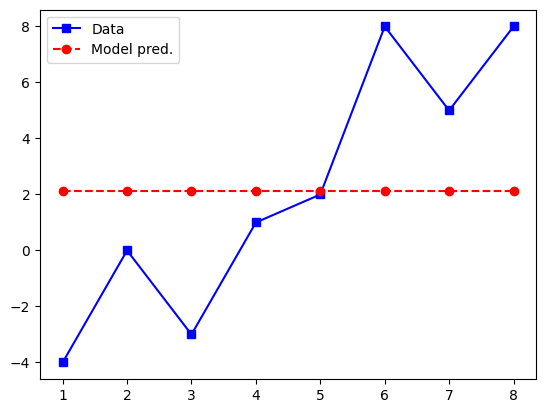

In [6]:
# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

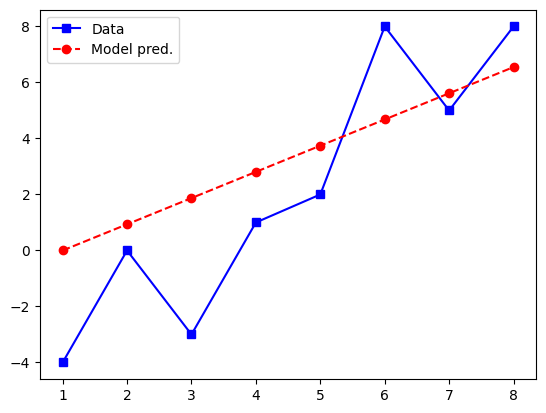

In [7]:

# new design matrix
X = np.array([np.arange(0,N)]).T

# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

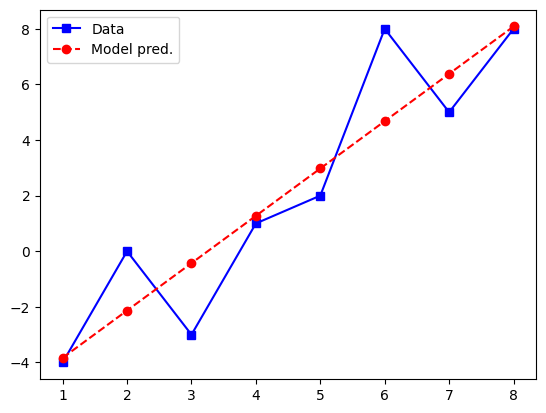

In [8]:

# design matrix
X = np.concatenate( [np.ones([N,1]),np.array([np.arange(0,N)]).T],axis=1)
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

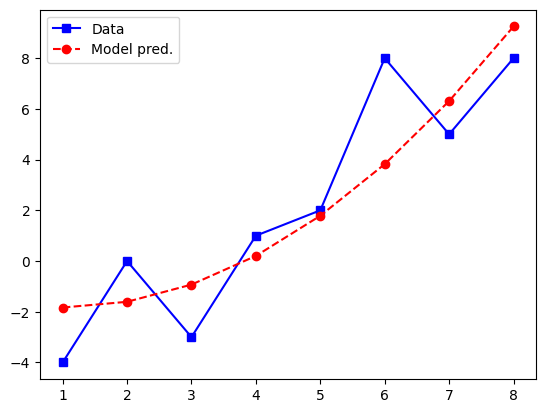

In [9]:
## now with nonlinearity in the design matrix

# design matrix
X = np.concatenate( [np.ones([N,1]),np.array([np.arange(0,N)**2]).T],axis=1)
# fit the model
b = np.linalg.solve(X.T@X,X.T@data)

# compute the model-predicted values
yHat = X@b

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()


---
# VIDEO: Least-squares example 2
---


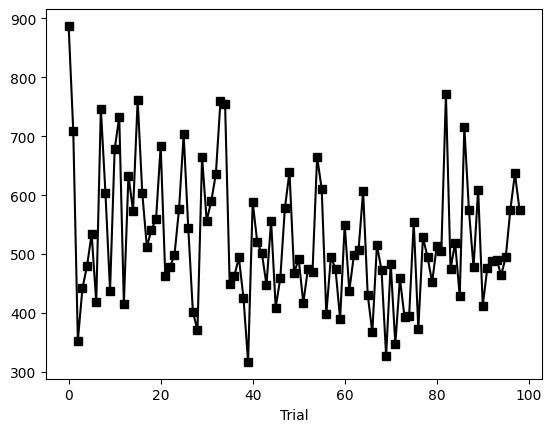

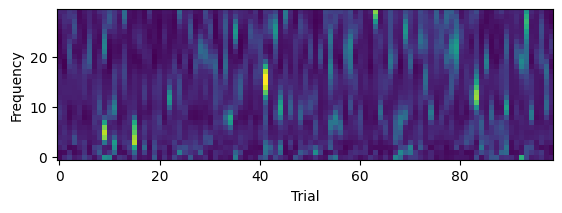

In [10]:

# load data
data = sio.loadmat('EEG_RT_data.mat')
rts = data['rts']
rts = rts[0]
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)


# show the data
plt.plot(rts,'ks-')
plt.xlabel('Trial')
plt.show()

plt.imshow(EEGdata,origin='lower')
plt.xlabel('Trial'), plt.ylabel('Frequency')
plt.show()

In [11]:
# create and fit the model for one frequency

X = np.concatenate( [np.ones([nTrials-1,1]),                   # intercept
                     np.reshape(rts[0:-1],(nTrials-1,1)),      # RTs
                     np.reshape(EEGdata[10,:-1],(nTrials-1,1)) # brain
                    ],axis=1)

b1 = np.linalg.solve(X.T@X,X.T@rts[1:])
b2 = np.linalg.lstsq(X,rts[1:],rcond=None)[0]
print(b1)
print(b2)

[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]
[ 4.02435056e+02  2.25627111e-01 -2.33132473e+01]


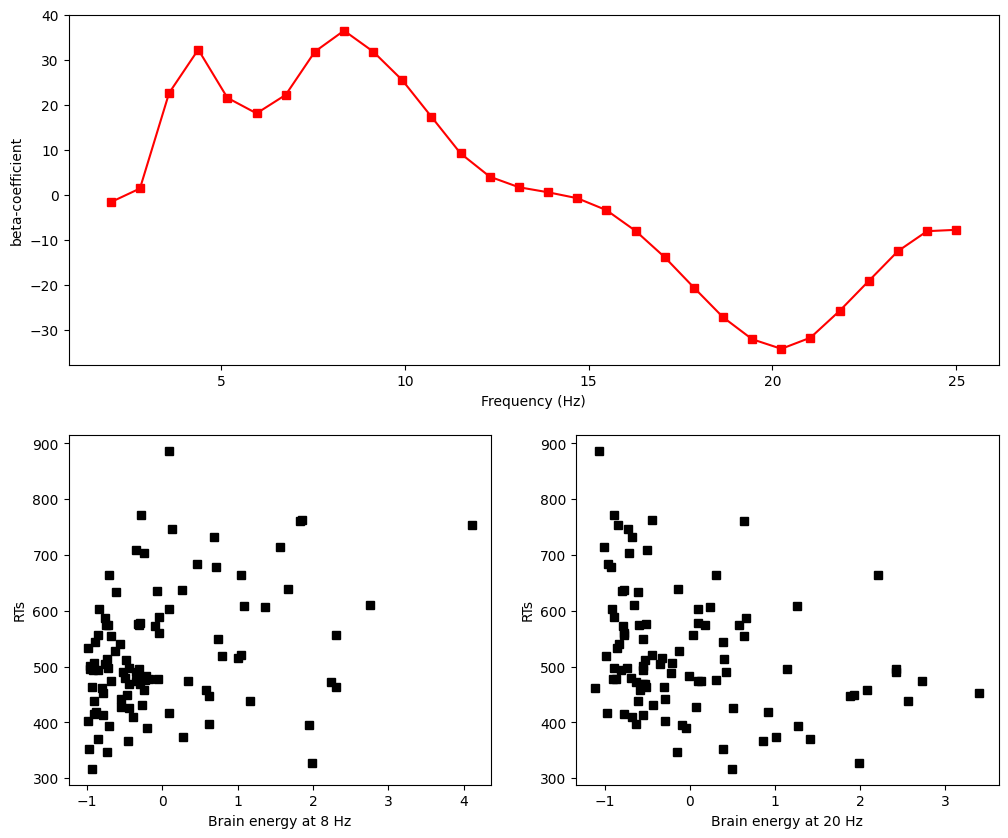

In [12]:
# initialize beta coefficients vector
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):
    
    # design matrix
    X = np.concatenate( [np.ones([nTrials,1]),                 # intercept
                         np.reshape(EEGdata[fi,:],(nTrials,1)) # brain
                        ],axis=1)
    
    # compute parameters
    t = np.linalg.lstsq(X,rts,rcond=None)[0]
    b[fi] = t[1]


# plots
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(frex,b,'rs-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('beta-coefficient')

plt.subplot(223)
plt.plot(EEGdata[8,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[8])) + ' Hz')

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,'ks')
plt.ylabel('RTs')
plt.xlabel('Brain energy at ' + str(int(frex[23])) + ' Hz')
plt.show()
